# Glass Classification

**Data Description**

1) RI: refractive index

2) Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

3) Mg: Magnesium

4) Al: Aluminum

5) Si: Silicon

6) K: Potassium

7) Ca: Calcium

8) Ba: Barium

9) Fe: Iron

**Type of glass: (class attribute)**

1) buildingwindowsfloatprocessed

2) buildingwindowsnonfloatprocessed 

3) vehiclewindowsfloatprocessed

4) vehiclewindowsnonfloatprocessed (none in this database)

5) containers

6) tableware

7) headlamps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

C:\Users\Mukul\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(43)

In [4]:
plt.style.use("ggplot")

In [5]:
df = pd.read_csv("../Excel/Glass.csv")

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [8]:
from pandas.plotting import parallel_coordinates

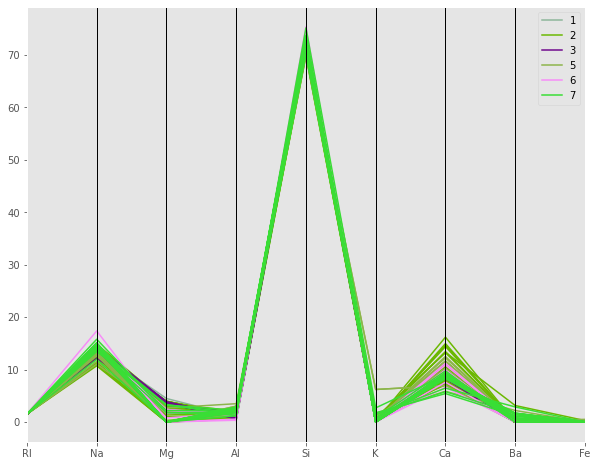

In [9]:
plt.figure(figsize=(10,8))
parallel_coordinates(df, "Type")

In [10]:
import missingno as msno

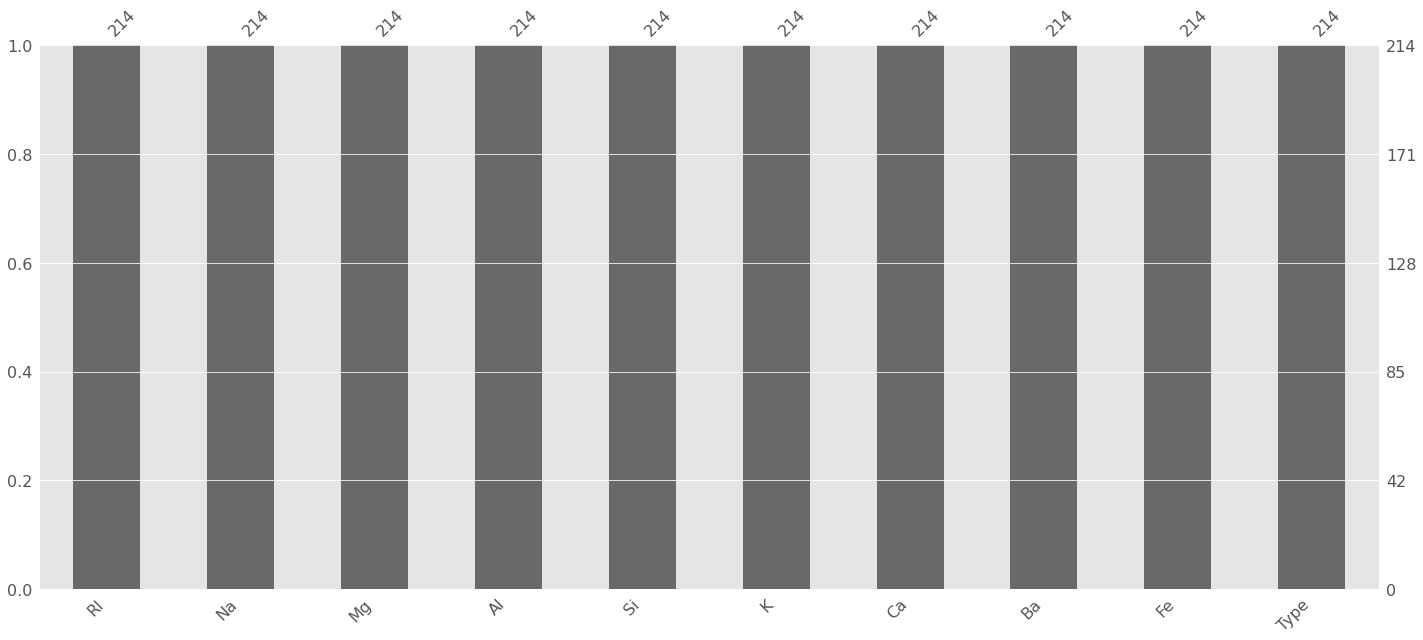

In [11]:
msno.bar(df)

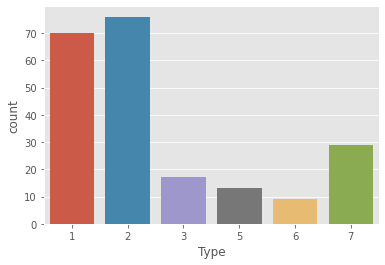

In [12]:
sns.countplot(df["Type"])

In [13]:
print(df.groupby("Type").min())
print("------------------------------------------------------------------")
print(df.groupby("Type").max())

           RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
Type                                                         
1     1.51215  12.45  2.71  0.29  71.35  0.00  7.78  0.0  0.0
2     1.51409  10.73  0.00  0.56  69.81  0.00  7.08  0.0  0.0
3     1.51610  12.16  3.34  0.58  71.36  0.00  8.32  0.0  0.0
5     1.51316  11.03  0.00  1.40  69.89  0.13  5.87  0.0  0.0
6     1.51115  13.79  0.00  0.34  72.37  0.00  6.65  0.0  0.0
7     1.51131  11.95  0.00  1.19  70.26  0.00  5.43  0.0  0.0
------------------------------------------------------------------
           RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
Type                                                            
1     1.52667  14.77  4.49  1.69  73.70  0.69  10.17  0.69  0.31
2     1.53393  14.86  3.98  2.12  74.45  1.10  16.19  3.15  0.35
3     1.52211  14.32  3.90  1.76  73.01  0.61   9.65  0.15  0.37
5     1.52369  14.01  2.68  3.50  73.88  6.21  12.50  2.20  0.51
6     1.51969  17.38  2.41  2.09  75.41  0.00  

In [14]:
col = df.columns

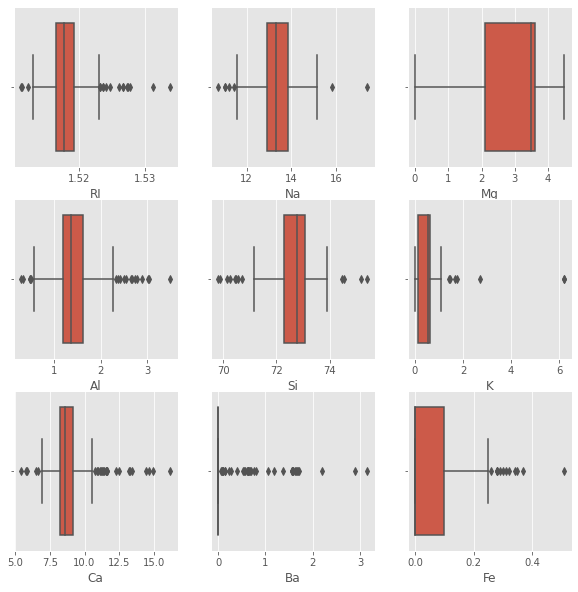

In [15]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
axes_all = [axes for axes_row in ax for axes in axes_row]
for i, c in enumerate(df[col]):
    if c  == "Type":
        break
    else:
        sns.boxplot(df[c], data = df, ax = axes_all[i])

In [22]:
#Detecting the no of outliers present in our data

def outlier_func(data, col):
    
    Q1 = df.quantile(q = 0.25, axis = 0)
    Q3 = df.quantile(q = 0.70, axis = 0)
    IQR = Q3-Q1
    
    min_val = Q1 - 1.5*IQR
    max_val = Q3 + 1.5*IQR
    
    df1 = df[df[col] <=  min_val[col]].shape[0]
    df2 = df[df[col] >=  max_val[col]].shape[0]
    
    print(f"There are {df1 + df2} total number of outliers in which {df1} datapoints are below or equals to the Q1 Deviation {Q1[col]} and {df2} are above or equal to the {Q3[col]}\n")
    print(f"The IQR of '{col}' is: {IQR[col]}")
    
    print(f"The Q1 Deviation of '{col}' is: {Q1[col]}")
    print(f"The Q3 Deviation of '{col}' is: {Q3[col]} \n")
    
    print("The min value is:", min(data[col]))
    print("The max value is:", max(data[col]), "\n")
    
    print("The skewness is: ",scipy.stats.skew(data[col]))
    print("The Kurtosis is: ",scipy.stats.kurtosis(data[col]))
    
    
    
    #Also returning the visual representation of the outlier
    
    plt.figure(figsize=(8,6))
    sns.distplot(data[col], color = 'g')
    plt.axvline(df[col].mean(), linestyle = '--', color = 'k')
    plt.axvline(df[col].median(), linestyle = '--', color = 'orange')
    
    plt.axvspan(xmin = Q1[col], xmax=data[col].min(), alpha = 0.15, color = 'r')
    plt.axvspan(xmin = Q3[col], xmax=data[col].max(), alpha = 0.15, color = 'r')
    
    plt.legend(["Mean", "Median","Outlier Bound"])

There are 30 total number of outliers in which 6 datapoints are below or equals to the Q1 Deviation 1.5165225000000002 and 24 are above or equal to the 1.5186929999999998

The IQR of 'RI' is: 0.002170499999999631
The Q1 Deviation of 'RI' is: 1.5165225000000002
The Q3 Deviation of 'RI' is: 1.5186929999999998 

The min value is: 1.51115
The max value is: 1.53393 

The skewness is:  1.6140150456619866
The Kurtosis is:  4.7893542254575


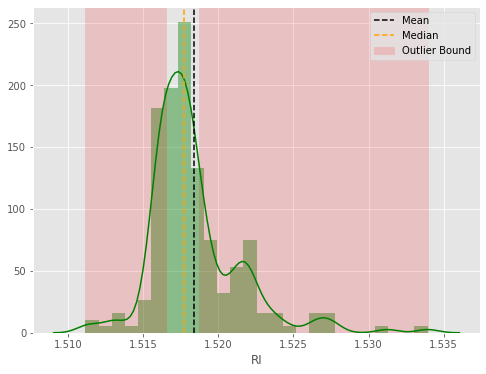

In [23]:
outlier_func(df, "RI")

In [24]:
df["Ba"].value_counts()

0.00    176
1.57      2
0.64      2
0.09      2
1.59      2
0.11      2
0.15      1
1.55      1
0.61      1
0.63      1
1.06      1
2.88      1
0.53      1
0.56      1
0.67      1
0.81      1
0.69      1
0.14      1
1.67      1
1.68      1
1.38      1
1.71      1
0.54      1
1.63      1
2.20      1
0.24      1
0.40      1
1.64      1
0.06      1
0.66      1
0.27      1
0.76      1
3.15      1
1.19      1
Name: Ba, dtype: int64

In [25]:
df.drop(labels = 'Ba', axis = 1, inplace = True) #Lets remove the 'Ba' from our datset as most of the values are 0

In [26]:
df

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,7


In [27]:
corrmat = df.corr()

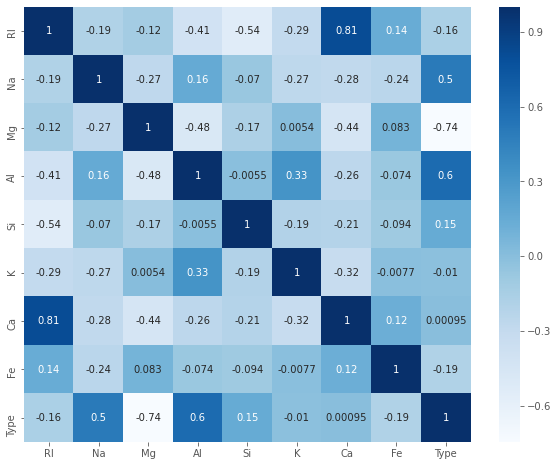

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap = 'Blues')

In [36]:
df.drop(labels = "RI", axis = 1, inplace = True)

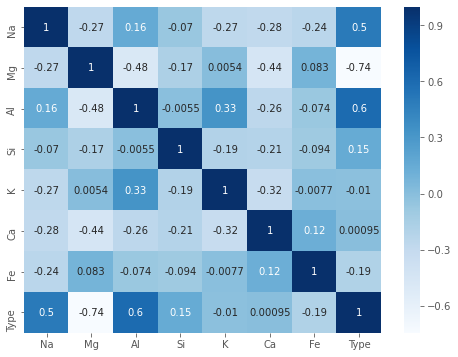

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [39]:
X = df.iloc[:, :7]

In [40]:
y = df.iloc[:, 7]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 7)
(43, 7)
(171,)
(43,)


In [43]:
test_score = []
train_score = []

In [44]:
for i in range(1,16):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

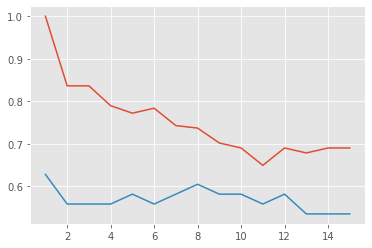

In [45]:
plt.plot(range(1,16), train_score)
plt.plot(range(1,16), test_score)

As per the above plot we can see that the 1 neighbors will be the ideal but we know if try to use the n with 1 it will overfit our model so we do not want that.

In [46]:
#lets try to standardize the data and then try
#We will also on additional parameter to 
from sklearn.preprocessing import StandardScaler

In [47]:
se = StandardScaler()

In [48]:
X_col = X.columns

In [49]:
X_std = se.fit_transform(X)

In [50]:
X_std = pd.DataFrame(X_std, columns = X_col)

In [51]:
X_std.mean()

Na    2.179980e-15
Mg   -2.801497e-16
Al   -3.434428e-16
Si    9.966067e-16
K     7.470660e-17
Ca   -3.137418e-16
Fe   -6.121791e-17
dtype: float64

In [52]:
X_std.std()

Na    1.002345
Mg    1.002345
Al    1.002345
Si    1.002345
K     1.002345
Ca    1.002345
Fe    1.002345
dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y , test_size = 0.2, random_state = 0)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 7)
(43, 7)
(171,)
(43,)


In [55]:
test_score = []
train_score = []

In [56]:
for i in range(1,16):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

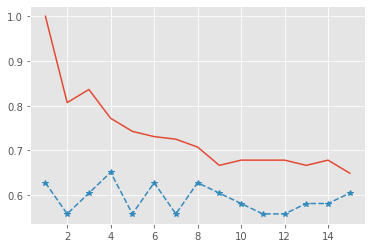

In [57]:
plt.plot(range(1,16), train_score)
plt.plot(range(1,16), test_score, linestyle = '--', marker = '*')

In [58]:
knn = KNeighborsClassifier(4)

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [60]:
y_pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, classification_report

In [62]:
print(accuracy_score(y_test, y_pred) * 100)

65.11627906976744


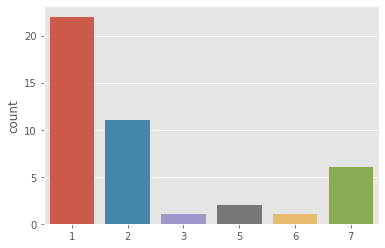

In [63]:
sns.countplot(y_pred)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y , test_size = 0.2, random_state = 0, stratify = y)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 7)
(43, 7)
(171,)
(43,)


In [66]:
neighbors = [x for x in range(1,16)]

In [67]:
cross_score = []
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(KNN, X, y, cv = 10, scoring = 'accuracy')
    cross_score.append(scores.mean())

In [68]:
MSE = [1-x for x in cross_score]

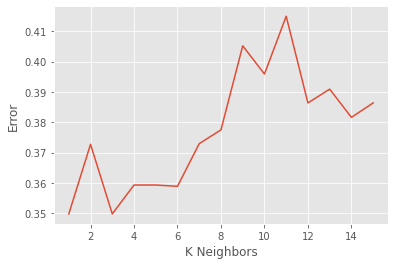

In [69]:
plt.plot(neighbors, MSE)
plt.xlabel("K Neighbors")
plt.ylabel("Error")
plt.show()

In [70]:
#So based on this, our best value for k is 3
KNN_Model = KNeighborsClassifier(n_neighbors = 3)
KNN_Model_Fit = KNN_Model.fit(X_train, y_train)
KNN_Model_Predict = KNN_Model_Fit.predict(X_test)

In [71]:
print(round(accuracy_score(y_test, KNN_Model_Predict) * 100),"%")

60 %


In [72]:
print(classification_report(y_test, KNN_Model_Predict))

              precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           7       0.50      0.50      0.50         6

    accuracy                           0.60        43
   macro avg       0.39      0.39      0.39        43
weighted avg       0.56      0.60      0.58        43



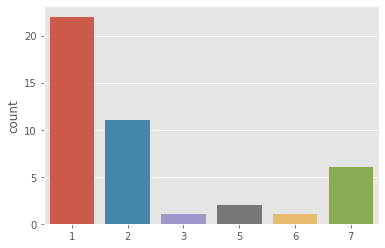

In [73]:
sns.countplot(y_pred)

In [ ]:
#Lets Try to Standardize the data after splitting the data and see if our accuracy improved or not
#By normalizing or standardizing the data after splitting, means we can avoid the issue of data leakage

In [74]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size = 0.2, random_state =0, stratify=y)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 7)
(43, 7)
(171,)
(43,)


In [76]:
#Now try to standardize the data
se_new = StandardScaler()

In [77]:
X_train_std = se_new.fit_transform(X_train_n)
X_test_std = se_new.fit_transform(X_test_n)

In [85]:
#So based on this, our best value for k is 3
KNN_Model = KNeighborsClassifier(n_neighbors = 3)
KNN_Model_Fit = KNN_Model.fit(X_train_std, y_train)
KNN_Model_Predict = KNN_Model_Fit.predict(X_test_std)

In [86]:
print(round(accuracy_score(y_test, KNN_Model_Predict) * 100),"%")

58 %


In [87]:
print(classification_report(y_test, KNN_Model_Predict))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67        14
           2       0.67      0.67      0.67        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           7       0.50      0.50      0.50         6

    accuracy                           0.58        43
   macro avg       0.37      0.38      0.37        43
weighted avg       0.53      0.58      0.55        43



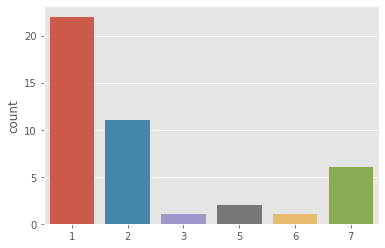

In [88]:
sns.countplot(y_pred)

Our accuracy score is not good because of the class imbalance and to fix this we can use some sampling techniques to tackle the class imbalance issue which I will be trying soon.

If you like this kernel, please do upvote. I am new to Machine Learning so if you have some feedbacks, please feel free to share with me.